In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Very Final Final Data.csv to Very Final Final Data.csv


In [ ]:
data = pd.read_csv('Very Final Final Data.csv', header = 0)
#to remove rows and columns with Null/NaN values.
data = data.dropna()

#change the income data from string to numeric data
data['income'] = pd.to_numeric(data['income'].str.replace(",", ""), errors='coerce')
print(data.shape)
print(list(data.columns))

(3302, 32)
['match', 'int_corr', 'samerace', 'imprace', 'imprelig', 'income', 'career', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']


In [ ]:
data.head()

,match,int_corr,samerace,imprace,imprelig,income,career,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr,sinc,intel,fun,amb,shar,like,prob
0,0,0.14,0,2,4,69487.0,15,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6,8,8,8,7,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
1,0,0.54,0,2,4,69487.0,15,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6,8,8,8,7,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
2,1,0.61,0,2,4,69487.0,15,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6,8,8,8,7,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0
3,1,0.21,0,2,4,69487.0,15,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6,8,8,8,7,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0
4,0,0.25,0,2,4,69487.0,15,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6,8,8,8,7,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0


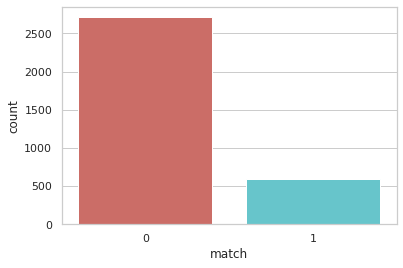

<Figure size 432x288 with 0 Axes>

In [ ]:
#Data visualization - to show the number of matched and unmatched data
data['match'].value_counts()

sns.countplot(x='match',data = data, palette = 'hls')
plt.show()
plt.savefig('match_plot')

In [ ]:
#Data Visualization - To get the percentage of unmatched and matched data
count_no_match = len(data[data['match']==0])
count_match = len(data[data['match']==1])
pct_of_no_match = count_no_match/(count_no_match+count_match)
print("percentage of no match is", pct_of_no_match*100)
pct_of_match = count_match/(count_no_match+count_match)
print("percentage of match", pct_of_match*100)

percentage of no match is 82.1320411871593
percentage of match 17.867958812840705


In [ ]:
#Data Visualization - Display the mean of all attributes for unmatched and matched data
data.groupby('match').mean()

,int_corr,samerace,imprace,imprelig,income,career,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr,sinc,intel,fun,amb,shar,like,prob
match,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.194462,0.426622,4.134218,4.008112,44808.923304,8.028761,20.705796,17.517371,20.729860,17.725018,11.413414,11.912334,31.678079,12.123271,13.767441,18.741460,11.733315,11.884841,7.144174,8.320428,7.729351,8.529499,7.588864,5.971792,7.160951,7.379794,6.139565,6.717736,5.125000,5.837094,4.870022
1,0.220271,0.450847,3.683051,3.742373,45651.435593,7.325424,20.589305,17.682102,20.449983,18.715271,11.491271,10.937339,31.110373,12.634864,14.613034,18.194797,11.673847,11.840644,7.325424,8.433898,7.989831,8.571186,7.622034,7.350847,7.961017,8.158475,7.630508,7.472881,6.744915,7.464407,6.448305


Obeservation
1. The matched couples will have higher the correlation between participant’s and partner’s ratings of interests in Time 1
2. the race will slightly affect their matching rate
3. the couples who have lower imprace & imprelig will have higher rate to find their matched partners
4. Suprisingly, the opinions or views of participants on what they look on the opposite sex, what the opposite sex looks for in a date and how do they think their measure up does not affect much on their matching rate.
5. For matched couples, the rating of partner's attributes by participants in their first match will be higher than unmatched couples. Same goes to how much do the participants like the partner and the probability that the partner think the person will say 'yes' for them.

Text(0, 0.5, 'Matched rating')

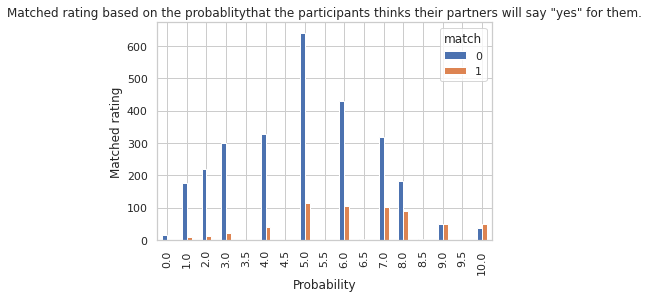

In [ ]:
#Data Visualization - To show the Matched rating based on the 
#probablity that the participants thinks their partners will say "yes" for them.
%matplotlib inline
pd.crosstab(data.prob,data.match).plot(kind='bar')
plt.title('Matched rating based on the probablity' + 
           'that the participants thinks their partners will say "yes" for them.')
plt.xlabel('Probability')
plt.ylabel('Matched rating')

Text(0, 0.5, 'Matched rating')

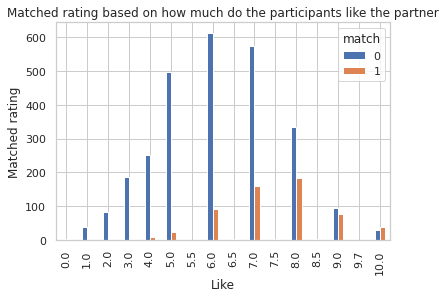

In [ ]:
#Data Visualization - To show the Matched rating based on how much do the 
#participants like the partner.
%matplotlib inline
pd.crosstab(data.like,data.match).plot(kind='bar')
plt.title('Matched rating based on how much do the participants like the partner')
plt.xlabel('Like')
plt.ylabel('Matched rating')

In [ ]:
#Separate the X and y from the dataset
X = data.loc[:, data.columns != 'match']
y = data.loc[:, data.columns == 'match']

In [ ]:
#Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
#split the data to training data and test data in 7:3 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['match'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of unmatched in oversampled data",len(os_data_y[os_data_y['match']==0]))
print("Number of matched",len(os_data_y[os_data_y['match']==1]))
print("Proportion of unmatched data in oversampled data is ",len(os_data_y[os_data_y['match']==0])/len(os_data_X))
print("Proportion of matched in oversampled data is ",len(os_data_y[os_data_y['match']==1])/len(os_data_X))

length of oversampled data is  3268
Number of unmatched in oversampled data 1634
Number of matched 1634
Proportion of unmatched data in oversampled data is  0.5
Proportion of matched in oversampled data is  0.5


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

# Without Regularization

In [ ]:
#Calculate Accuracy
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#split the date into training set and test set to rerun the model
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#get the accuravy 
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Index(['int_corr', 'samerace', 'imprace', 'imprelig', 'income', 'career',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc',
       'intel', 'fun', 'amb', 'shar', 'like', 'prob'],
      dtype='object')
Accuracy of logistic regression classifier on test set: 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# With Regularization

In [ ]:
# Recursive Feature Elimination
# Get the ranking of each features and find the top 20 most important feature
data_final_vars=data.columns.values.tolist()
y=['match']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False  True  True  True  True  True  True  True
 False False False False False False False False  True False  True  True
  True  True  True  True  True  True  True]
[ 1  1  8  1 12  1  1  1  1  1  1  1  4  3  2  6  5  7 11  9  1 10  1  1
  1  1  1  1  1  1  1]


In [ ]:
#show the top 20 important features
a1 = list(rfe.ranking_)
a = list(data.columns)
for i in range(0,len(a1)):
  if (a1[i] == 1):
    print(a[i+1])

int_corr
samerace
imprelig
career
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
fun3_1
amb3_1
attr
sinc
intel
fun
amb
shar
like
prob


In [ ]:
#Filter out less important features 
cols=['int_corr', 'samerace', 'imprelig', 'career', 
      'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 
      'fun3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']
X=os_data_X[cols]
y=os_data_y['match']

In [ ]:
# Implementing the model and check the p-values of variables
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.515748
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.256      
Dependent Variable: match            AIC:              3402.9295  
Date:               2021-06-01 13:32 BIC:              3500.4004  
No. Observations:   3268             Log-Likelihood:   -1685.5    
Df Model:           15               LL-Null:          -2265.2    
Df Residuals:       3252             LLR p-value:      8.2372e-238
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
imprelig      -0.0553    0.0159   -3.4831  0.0005  -0.0864  -0.0242
career        -0.0607    0.0101   -5.9827  0.0000

In [ ]:
#remove variables that p-values are greater than 0.05

cols=['imprelig', 'career', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 
      'fun3_1','attr', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']
X=os_data_X[cols]
y=os_data_y['match']
logit_model=sm.Logit(y,X)
result1=logit_model.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.515748
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.256      
Dependent Variable: match            AIC:              3402.9295  
Date:               2021-06-01 13:32 BIC:              3500.4004  
No. Observations:   3268             Log-Likelihood:   -1685.5    
Df Model:           15               LL-Null:          -2265.2    
Df Residuals:       3252             LLR p-value:      8.2372e-238
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
imprelig      -0.0553    0.0159   -3.4831  0.0005  -0.0864  -0.0242
career        -0.0607    0.0101   -5.9827  0.0000

In [ ]:
#Calculate Accuracy
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#split the date into training set and test set to rerun the model
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#get the accuravy 
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Index(['imprelig', 'career', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'fun3_1', 'attr', 'intel', 'fun', 'amb', 'shar',
       'like', 'prob'],
      dtype='object')
Accuracy of logistic regression classifier on test set: 0.76


Confusion Matrix

0,0 and 1,1 are correct predictions

0,1 and 1,0 are incorrect predictions

(Please refer to Seaborn diagram)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
#Seaborn
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logreg.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

Compute precision & recall

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Correlation Matrix

In [ ]:
general_Info = pd.DataFrame(data,columns=['match', 'int_corr', 'samerace', 'imprace', 'imprelig', 'income'])
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, 
#and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(general_Info.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation matrix about general information', fontdict={'fontsize':12}, pad=12);

In [ ]:
know_opposite = pd.DataFrame(data,columns=['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1'])
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(know_opposite.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation matrix about "What you look for in the opposite sex?', fontdict={'fontsize':12}, pad=12);

In [ ]:
measure_up = pd.DataFrame(data,columns=['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob'])
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(measure_up.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation matrix about "How do you think you measure up?"', fontdict={'fontsize':12}, pad=12);

ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Download the model


In [ ]:
import pickle
filename = 'model.pkl'
pickle.dump(logreg, open(filename, 'wb'))